In [ ]:
from library import *

In [ ]:
import pandas as pd
# read csv file from URL
url = "https://www.dropbox.com/s/juz13tx5oex2a67/train.csv?raw=1"
midterm_df = pd.read_csv(url)
midterm_df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<AxesSubplot:xlabel='Gender'>

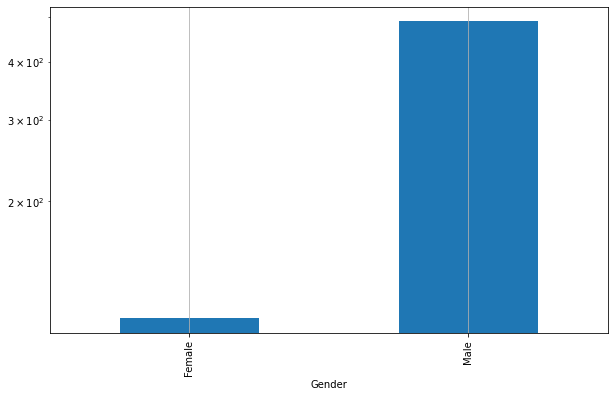

In [ ]:
# graph loan amount by male, remale mean
pd.crosstab(midterm_df["Gender"], midterm_df["LoanAmount"].mean()).plot(kind='bar', figsize=(10,6), grid=True, logy=True, legend=False)

<AxesSubplot:xlabel='Gender'>

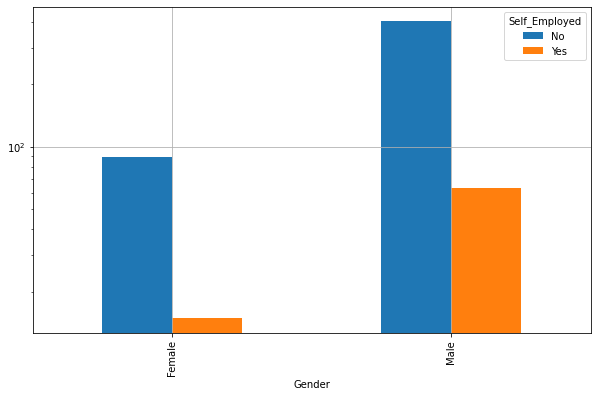

In [ ]:
# plot male vs female self employed
pd.crosstab(midterm_df["Gender"], midterm_df["Self_Employed"]).plot(kind='bar', figsize=(10,6), grid=True, logy=True)

<AxesSubplot:xlabel='Gender'>

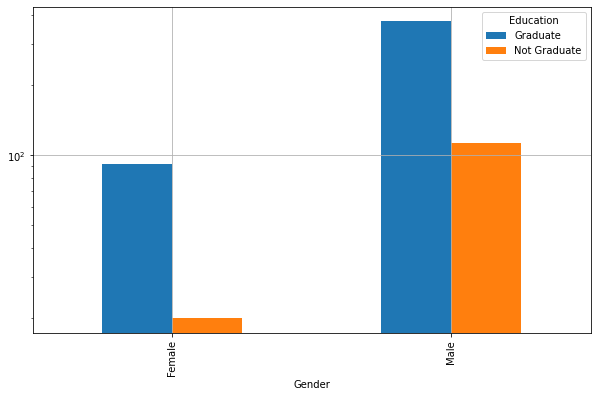

In [ ]:
# plot education male vs female
pd.crosstab(midterm_df["Gender"], midterm_df["Education"]).plot(kind='bar', figsize=(10,6), grid=True, logy=True)

<AxesSubplot:xlabel='Education'>

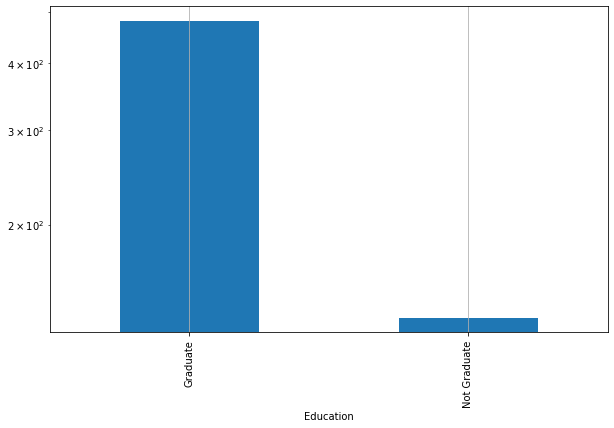

In [ ]:
# plot graduate vs non graduate loan amount
pd.crosstab(midterm_df["Education"], midterm_df["LoanAmount"].mean()).plot(kind='bar', figsize=(10,6), grid=True, logy=True, legend=False)


In [ ]:
# extract grads vs non grads
graduate_df = midterm_df.query('Education == "Graduate"')
non_graduate_df = midterm_df.query('Education == "Not Graduate"')
f"Number of grads: {len(graduate_df)}, number of non-grads: {len(non_graduate_df)}"

'Number of grads: 480, number of non-grads: 134'

In [ ]:
# Chapter 2

In [9]:
from pandas_profiling import ProfileReport
import pandas as pd

url = "https://www.dropbox.com/s/juz13tx5oex2a67/train.csv?raw=1"
chapter2_df = pd.read_csv(url)

In [10]:
chapter2_df
chapter2_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
mapping = {"Male": 0, "Female": 1}
mapped_df = chapter2_df.copy()
mapped_df["Gender"].replace(mapping, inplace=True)
mapped_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,0.0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,0.0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,0.0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0.0,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1.0,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,0.0,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,0.0,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,0.0,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [12]:
area_mapping_df = pd.get_dummies(chapter2_df,
                               prefix='Area',    #your choice
                               prefix_sep='_',     #your choice
                               columns=['Property_Area'],
                               dummy_na=False,    #will try to impute later so leave NaNs in place
                               drop_first=False    #really should be True but I wanted to give a clearer picture
                               )
area_mapping_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Area_Rural,Area_Semiurban,Area_Urban
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Y,0,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N,1,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y,0,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y,0,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Y,1,0,0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Y,1,0,0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Y,0,0,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Y,0,0,1


In [13]:
# replace strings where it makes sense
chapter2_df.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [14]:
chapter2_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [15]:
married_map = {"No": 0, "Yes": 1}
education_map = {"Not Graduate": 0, "Graduate": 1}
self_employed_map = {"No": 0, "Yes": 1}
property_area_map = {"Urban": 0, "Rural": 1, "Semiurban": 2}
loan_status_map = {"N": 0, "Y": 1}

crappy_replace_df = chapter2_df.copy()  # where all the values are replaced manually, not with pipeline
crappy_replace_df["Married"].replace(married_map, inplace=True)
crappy_replace_df["Education"].replace(education_map, inplace=True)
crappy_replace_df["Self_Employed"].replace(self_employed_map, inplace=True)
crappy_replace_df["Property_Area"].replace(property_area_map, inplace=True)
crappy_replace_df["Loan_Status"].replace(loan_status_map, inplace=True)
crappy_replace_df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,0,1
1,LP001003,Male,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,Male,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,Male,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,Male,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,1,1
610,LP002979,Male,1.0,3+,1,0.0,4106,0.0,40.0,180.0,1.0,1,1
611,LP002983,Male,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,0,1
612,LP002984,Male,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,0,1


In [16]:
from sklearn.pipeline import Pipeline

non_crappy_transformer = Pipeline(steps=[  # use a pipeline, not crappy!
    ("married", MappingTransformer("Married", married_map)),
    ("education", MappingTransformer("Education", education_map)),
    ("self_employed", MappingTransformer("Self_Employed", self_employed_map)),
    ("property", OHETransformer(target_column="Property_Area")),
    ("loan_status", MappingTransformer("Loan_Status", loan_status_map)),
    ], verbose=True)
    
non_crappy_df = non_crappy_transformer.fit_transform(chapter2_df)
non_crappy_df


[Pipeline] ........... (step 1 of 5) Processing married, total=   0.0s
[Pipeline] ......... (step 2 of 5) Processing education, total=   0.0s
[Pipeline] ..... (step 3 of 5) Processing self_employed, total=   0.0s
[Pipeline] .......... (step 4 of 5) Processing property, total=   0.0s
[Pipeline] ....... (step 5 of 5) Processing loan_status, total=   0.0s


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,Male,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,1,0,1
1,LP001003,Male,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0,0
2,LP001005,Male,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,1,0,1
3,LP001006,Male,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,0,1
4,LP001008,Male,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,1,0,0
610,LP002979,Male,1.0,3+,1,0.0,4106,0.0,40.0,180.0,1.0,1,0,0
611,LP002983,Male,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,1,0,1
612,LP002984,Male,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,1,0,1


In [17]:
# chapter 3

In [18]:
import pandas as pd
url = "https://www.dropbox.com/s/juz13tx5oex2a67/train.csv?raw=1"
chapter3_df = pd.read_csv(url)

pearson_df = chapter3_df.corr(method="pearson")
pearson_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [19]:
threshold = 0.4
masked_df = pearson_df.abs() > threshold
masked_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,True,False,True,False,False
CoapplicantIncome,False,True,False,False,False
LoanAmount,True,False,True,False,False
Loan_Amount_Term,False,False,False,True,False
Credit_History,False,False,False,False,True


In [20]:
import numpy as np
upper_mask = np.triu(masked_df, 1)
upper_mask

array([[False, False,  True, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])

In [21]:
# drop corrolated columns
correlated = np.any(upper_mask, 0)
correlated_columns = [masked_df.columns[i] for i, j in enumerate(upper_mask) if correlated[i]]
correlated_columns  # loan amount

['LoanAmount']

In [22]:
dropped_df = chapter3_df.drop(correlated_columns, axis=1)
dropped_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,360.0,1.0,Urban,Y


In [23]:
# chapter 4
import pandas as pd
url = "https://www.dropbox.com/s/juz13tx5oex2a67/train.csv?raw=1"
chapter4_df = pd.read_csv(url)
chapter4_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [24]:
def compute_sigma_boundaries(df, column_name):
    mean = df[column_name].mean()
    sigma = df[column_name].std()
    return (mean - 3 * sigma, mean + 3 * sigma)

In [25]:
sigma_min, sigma_max = compute_sigma_boundaries(chapter4_df, "ApplicantIncome")
(sigma_min, sigma_max)

(-12923.66573677391, 23730.584303549156)

In [26]:
chapter4_df["ApplicantIncome"].min(), chapter4_df["ApplicantIncome"].max()


(150, 81000)

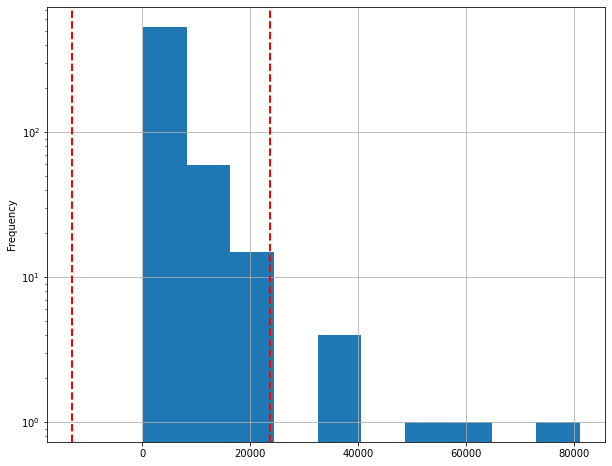

In [27]:
ax = chapter4_df["ApplicantIncome"].plot(kind="hist", figsize=(10, 8), grid=True, logy=True)
ax.axvline(x=sigma_min, ymin=0, ymax=1, color="r", linestyle="--", lw=2)  # low fence
ax.axvline(x=sigma_max, ymin=0, ymax=1, color="r", linestyle="--", lw=2)  # high fence


In [28]:
    """
    Check for skew values
    greater than 1 = highly skewed right
    """

    chapter4_df["ApplicantIncome"].skew()

6.539513113994625

In [29]:
# Kurtosis values: > 0 = heavy tails / outliers
chapter4_df["ApplicantIncome"].kurtosis()

60.54067593369113

In [30]:
sigma_min, sigma_max = compute_sigma_boundaries(chapter4_df, "CoapplicantIncome")
sigma_min, sigma_max

(-7157.4993096454655, 10399.990905699668)

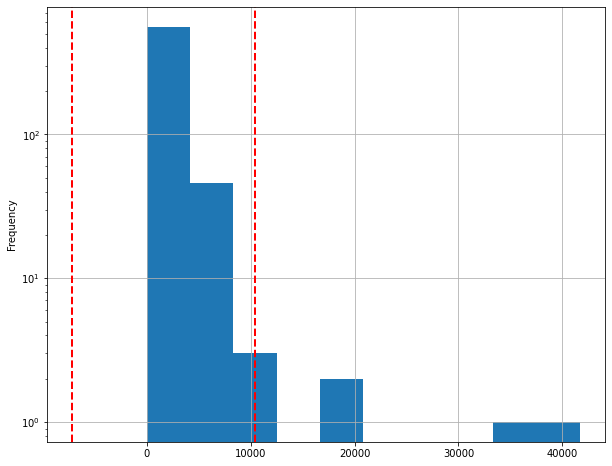

In [31]:
ax = chapter4_df['CoapplicantIncome'].plot(kind='hist', figsize=(10,8), grid=True, logy=True)
ax.axvline(x=sigma_min, ymin=0, ymax=1, color='r', linestyle='--', lw=2)  #low fence
ax.axvline(x=sigma_max, ymin=0, ymax=1, color='r', linestyle='--', lw=2)  #high fence

In [32]:
# CoapplicantIncome skew values
chapter4_df["CoapplicantIncome"].skew(), chapter4_df["ApplicantIncome"].kurtosis()


(7.491531216657306, 60.54067593369113)

In [33]:
minb, maxb = compute_sigma_boundaries(chapter4_df, "ApplicantIncome")
chapter4_df["Clipped"] = chapter4_df["ApplicantIncome"].clip(lower=minb, upper=maxb)


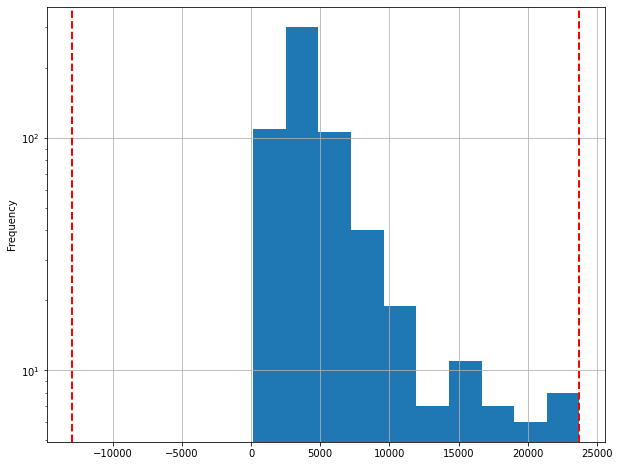

In [34]:
s3min, s3max = compute_sigma_boundaries(chapter4_df, 'ApplicantIncome')
ax = chapter4_df['Clipped'].plot(kind='hist', figsize=(10,8), grid=True, logy=True)
ax.axvline(x=s3min, ymin=0, ymax=1, color='r', linestyle='--', lw=2)  #low fence
ax.axvline(x=s3max, ymin=0, ymax=1, color='r', linestyle='--', lw=2)  #high fence

In [35]:
chapter4_df["ApplicantIncome"].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [36]:
import random
import statistics
random.seed(1234)

rlist = sorted(random.sample(range(1, 50), 12))
rlist

[1, 2, 3, 6, 7, 8, 16, 23, 29, 38, 43, 46]

In [37]:
q1 = 4.5  # median of left half of rlist
q2 = 12 # rlist median
q3 = 33.5 # median of right half
q4 = 46  # right half
iqr = q3 - q1
iqr

29.0

/var/folders/n2/fm6sw4jd58g_10b0121qg6xm0000gn/T/ipykernel_43257/2150905120.py:14: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  fig.show()


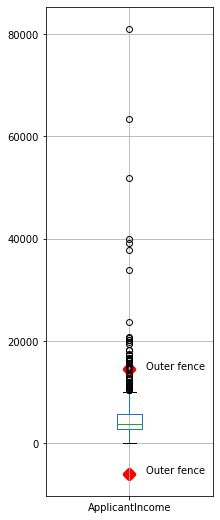

In [38]:
import matplotlib.pyplot as plt
column = "ApplicantIncome"
fig, ax = plt.subplots(1, 1, figsize=(3, 9))
chapter4_df.boxplot(column, vert=True, ax=ax, grid=True)
q1 = chapter4_df[column].quantile(0.25)
q3 = chapter4_df[column].quantile(0.75)
iqr = q3 - q1
outer_low = q1 - 3 * iqr
outer_high = q3 + 3 * iqr
ax.scatter(1, outer_low, c='red', label='outer_low', marker="D", linewidths=5)
ax.text(1.1,  outer_low, "Outer fence")
ax.scatter(1, outer_high, c='red', label='outer_high', marker="D", linewidths=5)
ax.text(1.1,  outer_high, "Outer fence")
fig.show()


In [39]:
# chapter 5 
url = "https://www.dropbox.com/s/juz13tx5oex2a67/train.csv?raw=1"
chapter5_df = pd.read_csv(url)

In [40]:
transformer = Pipeline(steps=[
    ("co_app", TukeyTransformer(target_column="CoapplicantIncome", fence="inner"))
], verbose=True)

transformed_df = transformer.fit_transform(chapter5_df)

[Pipeline] ............ (step 1 of 1) Processing co_app, total=   0.0s


In [41]:
transformed_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [42]:
chapter5_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [43]:
demo_df = transformed_df[["ApplicantIncome", "CoapplicantIncome"]]
demo_df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.000
CoapplicantIncome,614.0,1419.702231,1624.605892,0.0,0.0,1188.5,2297.25,5743.125


In [44]:
# before scaling

<AxesSubplot:ylabel='Frequency'>

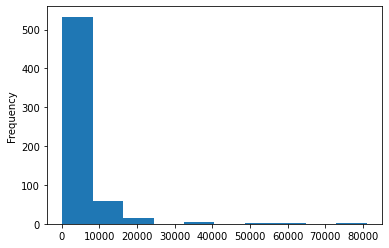

In [45]:
transformed_df["ApplicantIncome"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

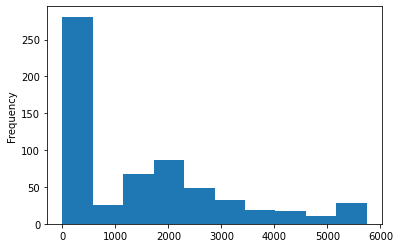

In [46]:
transformed_df["CoapplicantIncome"].plot(kind="hist")

Min max scaling

In [47]:
demo2_df = demo_df.copy()
mi = demo2_df["CoapplicantIncome"].min()
mx = demo2_df["CoapplicantIncome"].max()
denom = mx - mi
demo2_df["CoapplicantIncome"] -= mi
demo2_df["CoapplicantIncome"] /= denom
demo2_df["CoapplicantIncome"].min(), demo2_df["CoapplicantIncome"].max()

(0.0, 1.0)

<AxesSubplot:ylabel='Frequency'>

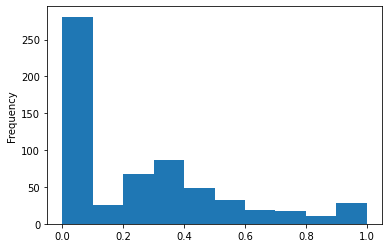

In [48]:
demo2_df["CoapplicantIncome"].plot(kind="hist")

Haha sucker! sklearn already has this

In [49]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
numpy_result = scalar.fit_transform(demo_df)
new_df = pd.DataFrame(numpy_result, columns=["ApplicantIncome", "CoapplicantIncome"])
new_df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,0.064978,0.075560,0.0,0.033735,0.045300,0.069821,1.0
CoapplicantIncome,614.0,0.247200,0.282878,0.0,0.000000,0.206943,0.400000,1.0


<AxesSubplot:ylabel='Frequency'>

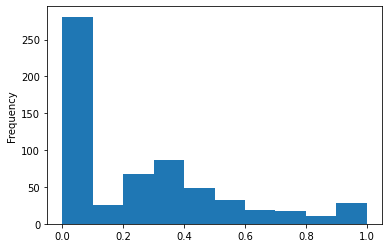

In [50]:
new_df["CoapplicantIncome"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

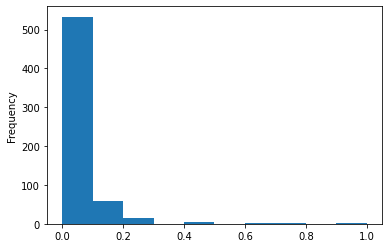

In [51]:
new_df["ApplicantIncome"].plot(kind="hist")

Standardization

In [52]:
demo2_df = demo_df.copy()[-100:]
mi = demo2_df["ApplicantIncome"].mean()
mx = demo2_df["ApplicantIncome"].std()
demo2_df["ApplicantIncome"] -= mi
demo2_df["ApplicantIncome"] /= mx

new_applicant = demo2_df["ApplicantIncome"]
min(new_applicant), max(new_applicant)

(-1.2518227995792002, 4.005531876667576)

But guess what again sucker, THERE'S A BUILT IN TRANSFORMER FOR THIS TOO! HAHAHA

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df = pd.DataFrame(scalar.fit_transform(demo_df), columns=["CoapplicantIncome", "ApplicantIncome"])
new_df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
CoapplicantIncome,614.0,0.064978,0.075560,0.0,0.033735,0.045300,0.069821,1.0
ApplicantIncome,614.0,0.247200,0.282878,0.0,0.000000,0.206943,0.400000,1.0


Robust Scalar

In [54]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
new_df = pd.DataFrame(scalar.fit_transform(demo_df), columns=["CoapplicantIncome", "ApplicantIncome"])
new_df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
CoapplicantIncome,614.0,0.064978,0.075560,0.0,0.033735,0.045300,0.069821,1.0
ApplicantIncome,614.0,0.247200,0.282878,0.0,0.000000,0.206943,0.400000,1.0


<AxesSubplot:ylabel='Frequency'>

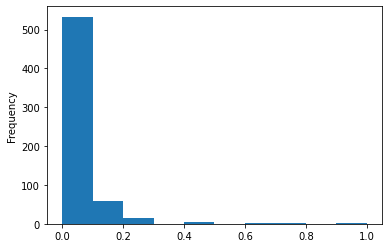

In [55]:
new_df["CoapplicantIncome"].plot(kind="hist")

Chapter 6

In [56]:
url = "https://www.dropbox.com/s/juz13tx5oex2a67/train.csv?raw=1"
chapter6_df = pd.read_csv(url)
chapter6_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [57]:
chapter6_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [64]:
transformer6 = Pipeline(steps=[
    ("applicant", TukeyTransformer(target_column="ApplicantIncome", fence="outer")),
    ("coapp", TukeyTransformer(target_column="CoapplicantIncome", fence="outer")),
], verbose=True)
transformed_df = transformer6.fit_transform(chapter6_df)

[Pipeline] ......... (step 1 of 2) Processing applicant, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing coapp, total=   0.0s


In [65]:
transformed_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


Chapter 7

In [66]:
url = "https://www.dropbox.com/s/juz13tx5oex2a67/train.csv?raw=1"
chapter7_df = pd.read_csv(url)
chapter7_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [68]:
transformer = Pipeline(steps=[
    ("married", MappingTransformer(mapping_column="Married", mapping_dict={"No": 0, "Yes": 1}))
], verbose=True)
transformed_df = transformer.fit_transform(chapter7_df)

[Pipeline] ........... (step 1 of 1) Processing married, total=   0.0s


In [72]:
transformed_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,0.0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,1.0,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,1.0,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,1.0,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,0.0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,0.0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,1.0,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,1.0,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,1.0,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [116]:
from sklearn.model_selection import train_test_split
chapter7_df["Married"].fillna(0)
labels = chapter7_df["Married"]
x_train, x_test, y_train, y_test = train_test_split(transformed_df, labels, test_size=0.2, shuffle=True, random_state=0)